## Rezoomed NOAA aerial imaging crops so buildings appear farther

In [18]:
# Frozen convolutional base, re-initialized FC layer.
# No data augmentation.
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(7*7*512), name='dense1'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

# No data augmentation, on small clean dataset.
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')

# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

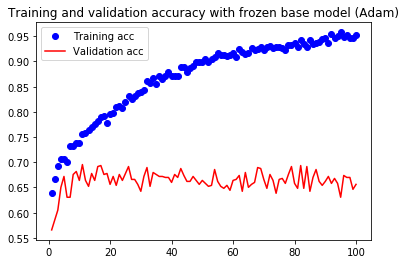

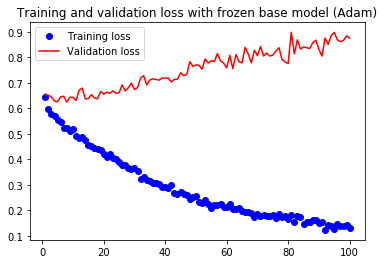

In [20]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model (Adam)')
plt.legend()

plt.show()

In [ ]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(7*7*512), name='dense1'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

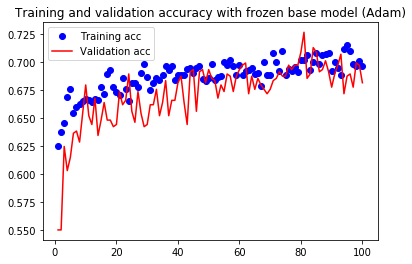

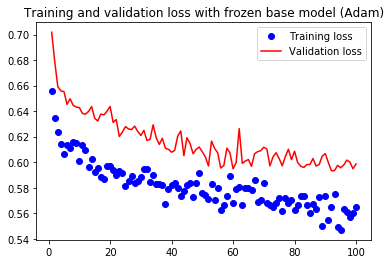

In [22]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model (Adam)')
plt.legend()

plt.show()

In [ ]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Additional, smaller Dense layer.
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(7*7*512), name='dense1'))
new_top_model.add(layers.Dense(128,activation='relu', input_dim=512, name='dense2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

# No data augmentation, on small clean dataset.
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

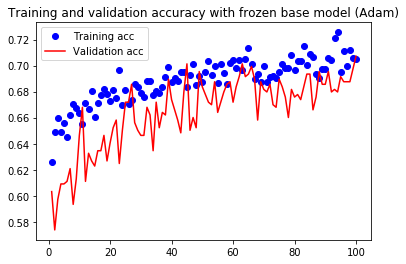

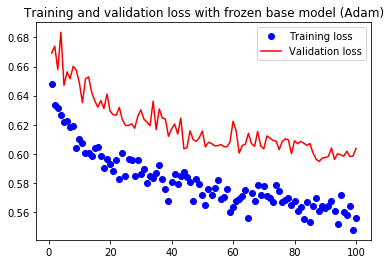

In [24]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model (Adam)')
plt.legend()

plt.show()

In [25]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Smaller Dense layer replacing 512 unit layer at top.
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(128,activation='relu', input_dim=(7*7*128), name='dense1'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

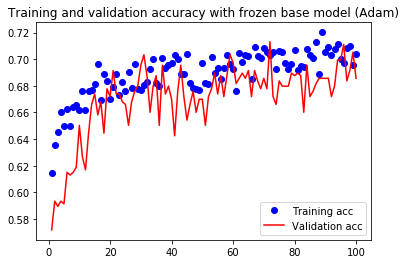

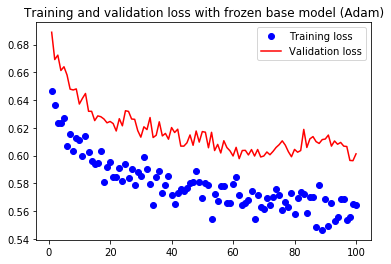

In [26]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model (Adam)')
plt.legend()

plt.show()

In [27]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Remove dropout before dense layer.
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(7*7*512), name='dense1'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

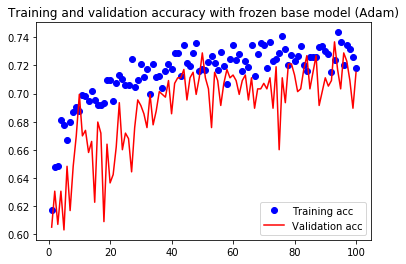

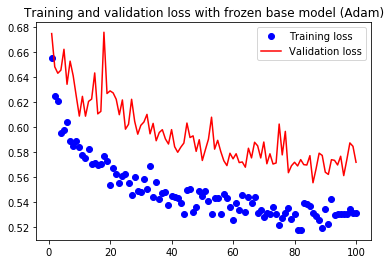

In [28]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model (Adam)')
plt.legend()

plt.show()

In [29]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Remove dropout before dense layer.
# Add another dense layer.
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

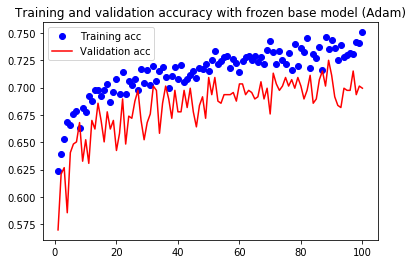

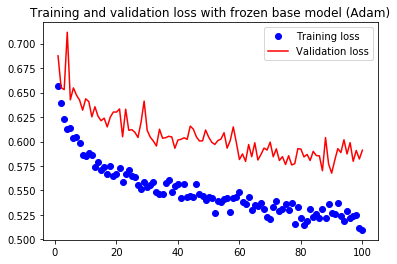

In [30]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model (Adam)')
plt.legend()

plt.show()

In [2]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Remove dropout before dense layer.
# Add 2 dense layers (attempting to overfit).
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dense(2048,activation='relu', input_dim=(7*7*2048), name='dense1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(6272*1024), name='dense2'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense3'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

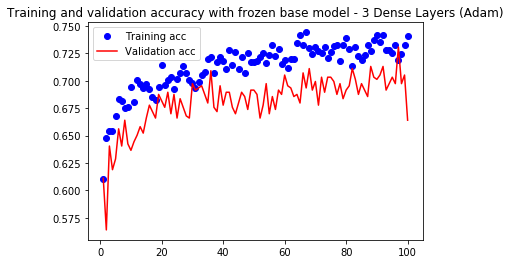

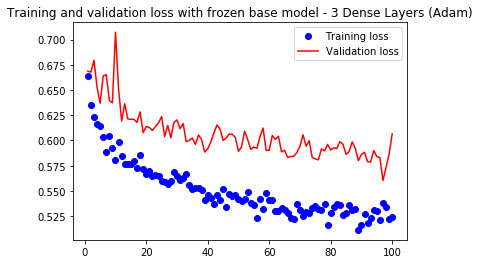

In [3]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.show()

In [5]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last conv layer base model weights.
# Remove dropout before dense layer.
# Add another dense layer.
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-3]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

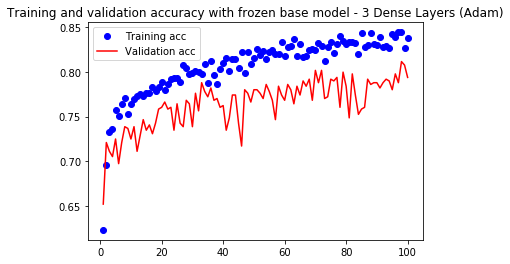

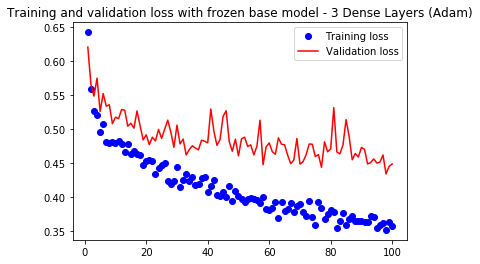

In [6]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.show()

In [7]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last conv layer base model weights.
# Add a dense layer w/dropout.
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-3]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

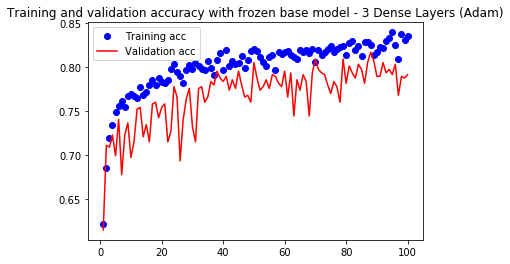

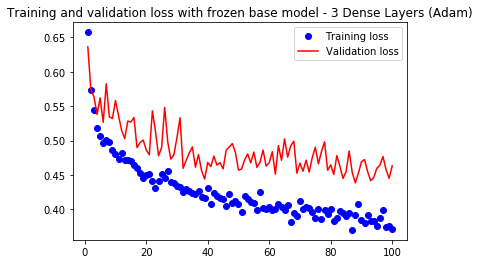

In [8]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.show()

In [10]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Before attempting to add more dropout/regularization, train on top of last 2 conv layers base model weights.
# Keep extra dense layers, no dropout.
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-6]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

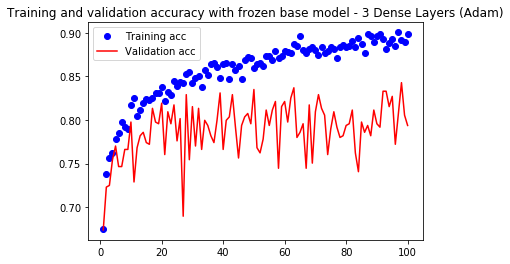

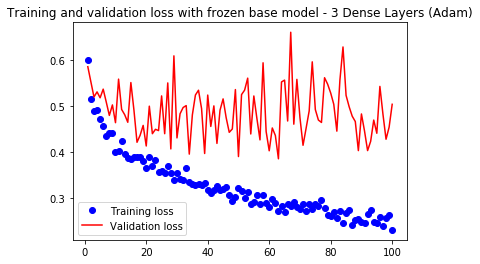

In [11]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.show()

In [12]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last conv layer base model weights.
# Add a dense layer w/dropout.
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-3]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

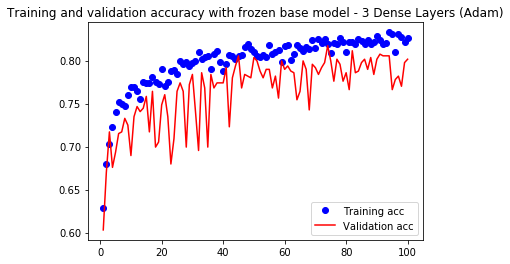

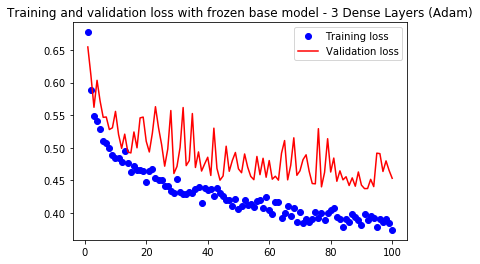

In [13]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.show()

In [14]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last conv layer base model weights.
# Add a dense layer w/dropout.
# 300 epochs
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-3]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=300,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

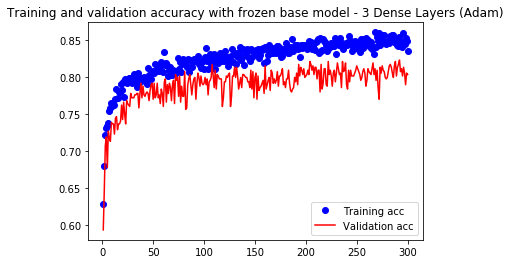

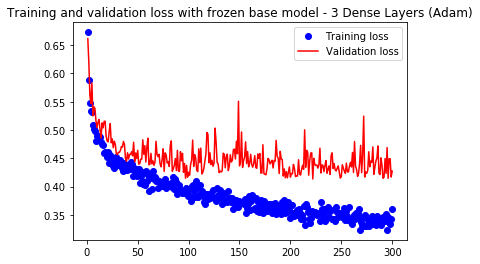

In [15]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.show()

In [16]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last conv layer base model weights.
# 300 
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-3]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.6, name='dropout1'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=300,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

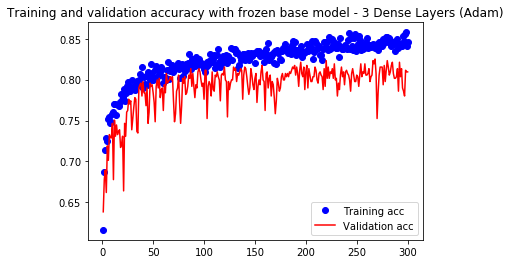

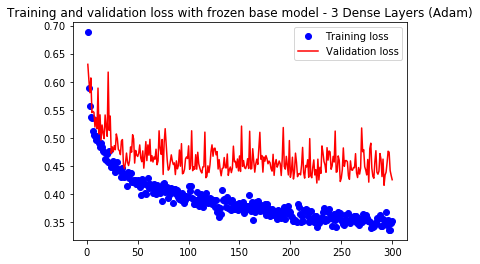

In [18]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.show()

In [15]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last conv layer base model weights.
# 100 
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-3]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
#new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

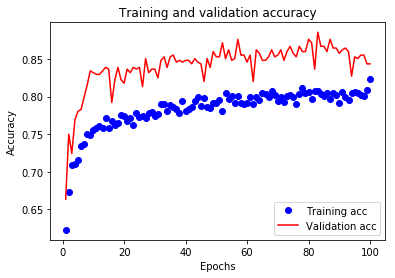

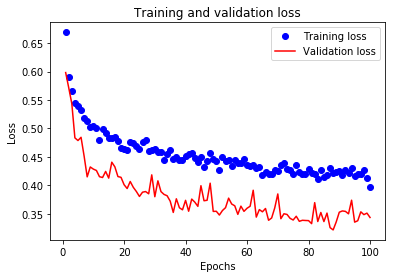

In [16]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('ddetection_acc.png', format='png')
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('ddetection_loss.png', format='png')
plt.show()

In [21]:
new_top_model.save('1024_512_dl_2dropout_1conv_100ep.h5')

In [17]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last conv layer base model weights.
# Same, 200 epochs 
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-3]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
#new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=200,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

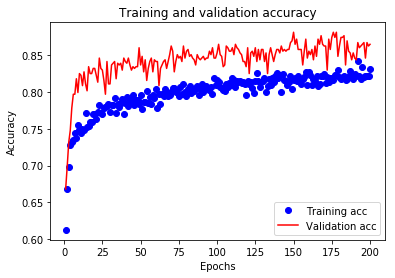

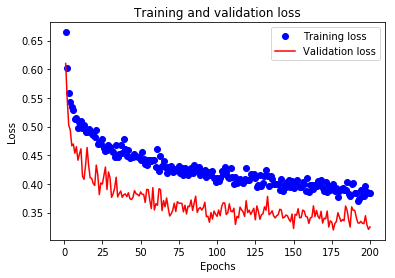

In [18]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('ddetection_acc_200.png', format='png')
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('ddetection_loss_200.png', format='png')
plt.show()

In [19]:
new_top_model.save('1024_512_dl_2dropout_1conv_200ep_7030.h5')

In [1]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last conv layer base model weights.
# Same, 400 epochs 
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-3]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
#new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=400,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

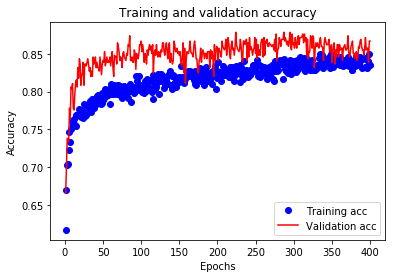

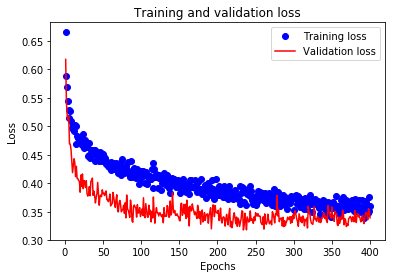

In [2]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('ddetection_acc_400.png', format='png')
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('ddetection_loss_400.png', format='png')
plt.show()

In [3]:
new_top_model.save('1024_512_dl_2dropout_1conv_400ep_7030.h5')

In [22]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last conv layer base model weights.
# 100 
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-3]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
new_top_model.add(layers.Dropout(0.5, name='dropout3'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

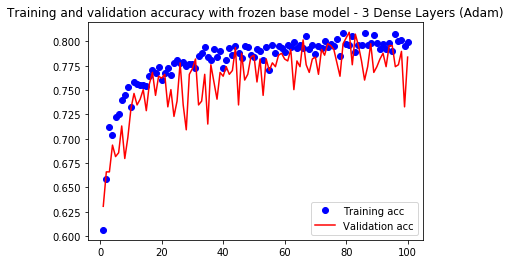

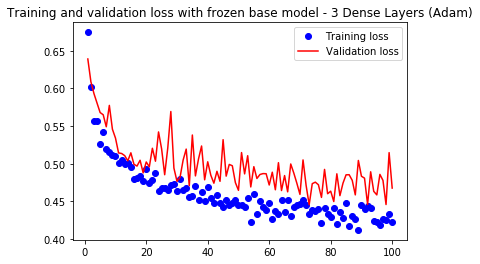

In [23]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.show()

In [24]:
new_top_model.save('1024_512_dl_3dropout_1conv_100ep.h5')

In [25]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last 2 conv layers base model weights.
# 100 
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-6]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

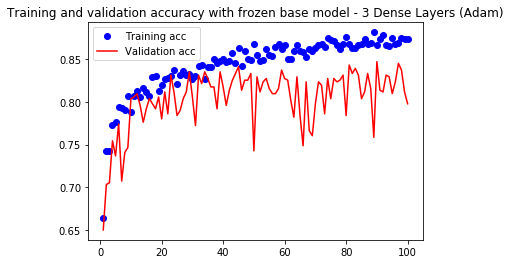

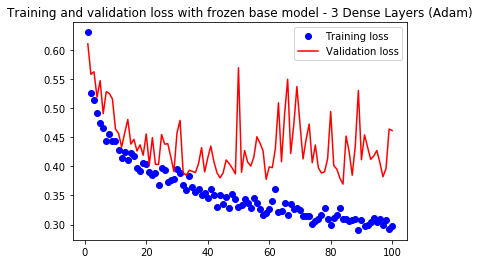

In [26]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.show()

In [27]:
new_top_model.save('1024_512_dl_2dropout_2conv_100ep.h5')

In [28]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last 2 conv layers base model weights.
# Increase dropout.
# 100 
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-6]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.8, name='dropout1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

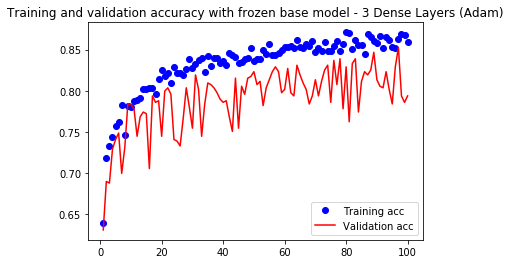

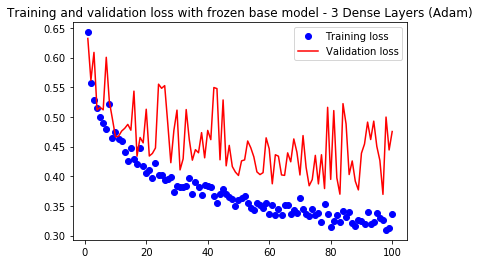

In [29]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.show()

In [30]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last conv layer base model weights.
# 200 epochs 
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-3]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=200,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

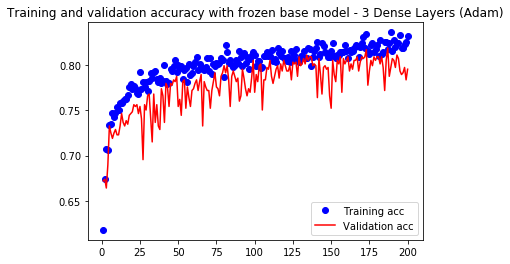

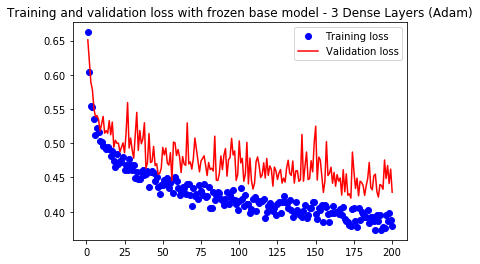

In [31]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.show()

In [32]:
new_top_model.save('1024_512_dl_2dropout_1conv_200ep.h5')

In [39]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last conv layer base model weights.
# 200 epochs 
# lr = 0.0007
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-3]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()


train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')

# Compile model
new_top_model.compile(optimizer=optimizers.Adam(lr=0.0007),
              loss='binary_crossentropy',
              metrics=['acc'])

history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=200,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

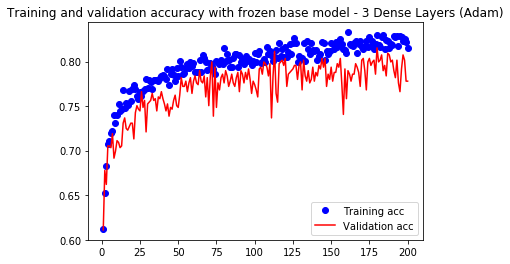

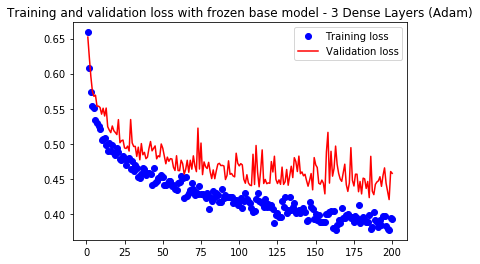

In [40]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model - 3 Dense Layers (Adam)')
plt.legend()

plt.show()

In [41]:
new_top_model.save('1024_512_dl_2dropout_1conv_200ep_lr0007.h5')

In [12]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last conv layer base model weights.
# 100 epochs
# Shuffle generators
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-3]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
#new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des_balanced/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des_balanced/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

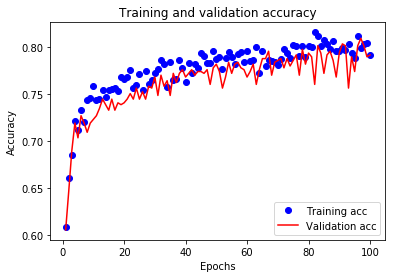

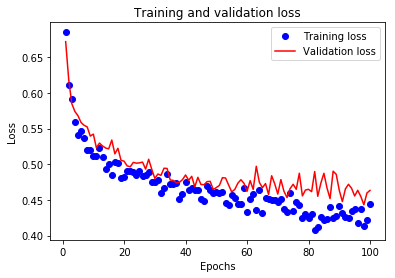

In [13]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('ddetection_acc_bal.png', format='png')
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('ddetection_loss_bal.png', format='png')
plt.show()

In [3]:
new_top_model.save('1024_512_dl_2dropout_1conv_100ep_balanced.h5')

In [4]:
# Frozen convolutional base, re-initialized FC layer.
# Data augmentation.
# Train on top of last 2 conv layers base model weights.
# 100 
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers[:-6]:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(input_shape=(7,7,128), name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(1024,activation='relu', input_dim=(7*7*1024), name='dense1'))
new_top_model.add(layers.Dropout(0.5, name='dropout2'))
new_top_model.add(layers.Dense(512,activation='relu', input_dim=(6272*512), name='dense2'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')


# Compile model
new_top_model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

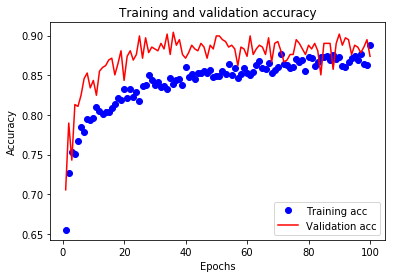

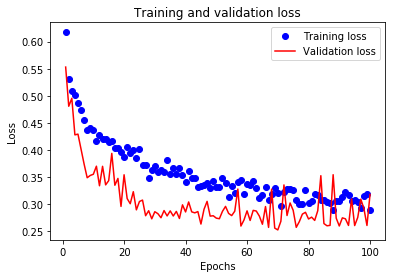

In [5]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('ddetection_acc_2conv.png', format='png')
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('ddetection_loss_2conv.png', format='png')
plt.show()

In [6]:
new_top_model.save('1024_512_dl_2dropout_2conv_100ep_7030.h5')